In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100   ## show the maximum columns
pd.set_option("max_colwidth", 200)

In [20]:
data = pd.read_csv('Python_db_test.csv', delimiter = "|")
data

,Loan number,Customer number,Member Name,Spouse Name,Guarantor Name,Guarantor Relation,Office Name,Office Code,Center Name,Center Code,Group Name,Group Code,Center Formation Date,Center Meeting Day,Meeting Time,Date of Birth,Guarantor Date of Birth,Religion,Caste,Occupation,Residence Address Line-1(H no/Block),Village,Gram Panchayat,Block/Municipality,District,Pincode,State,Village Locale,Residence Phone Number,Mobile Number,Gross Income,Gender,Officer Name,Officer Employee Number,Sales Officer Name,Sales Officer Code,Purpose of Loan,Land Holding(Acres),Sub-Purpose,Vendor Type,Business Type,Category of Loan,Cycle Number,Approval Date,Disbursement Date,First Installment Date,Last Installment Date,Product Name,Product Code,Product Interest Rate(%),Loan Amount,Approved Amount,Processing Fees,Insurance Charges,Other Charges,Installment Amount(First Slab),Loan Tenure,Number of Installments,Installment Frequency,Current OD,Principal Overdue,Total Interest Collected,Interest OverDue,Overdue Days,Voter ID Card,Ration Card,Aadhaar Number,Number of Installments(Paid),Completed Installment Number,Last Payment Date,Last Payment Amount,Parked Amount,Principal Outstanding,Interest Outstanding,Loan Status,Fund Source,COVID19 Moratorium,Is Restructured,Account DPD Classification
0,10020280XXXXXX,1002000005,Lakshmi Devi,NaN,RAJESH KUMAR,Son,Begusarai,1002,AJAD NAGAR KASHIMPUR BEGUSARAI,10020001,10020001-1,10020001-1,12-May-2018,Thursday,08:30,01-Jan-1986,01-Jan-2001,Hindu,Other Backward Class,Agriculture,"AJAD NAGAR, KASHIMPUR, BEGUSARAI",AJAD NAGAR,AJAD NAGAR,BHAGWAN PUR,Begusarai,851129,Bihar,Rural,620794XXXX,NaN,0,Female,Shushant Kumar,11790,NaN,NaN,Income Generation,No Land,Agriculture,NaN,NaN,Group Loan,3,NaN,03-Feb-2022,17-Feb-2022,15-Feb-2024,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,NaN,NaN,NaN,1180,106 Weeks,53,Fortnightly,NaN,0.00,11399.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5156.00,511.00,Current,MS0222130A,No,No,Current
1,10020280XXXXXX,1002000002,Soniya Devi,NaN,DHARMASHILA DEVI,Mother,Begusarai,1002,AJAD NAGAR KASHIMPUR BEGUSARAI,10020001,10020001-1,10020001-1,12-May-2018,Thursday,08:30,01-Jan-1988,NaN,Hindu,Scheduled Caste,Agriculture,"AJAD NAGAR, KASHIMPUR, BEGUSARAI",AJAD NAGAR,AJAD NAGAR,BHAGWAN PUR,Begusarai,851129,Bihar,Rural,725061XXXX,NaN,0,Female,Shushant Kumar,11790,NaN,NaN,Income Generation,No Land,Agriculture,NaN,NaN,Group Loan,3,NaN,03-Feb-2022,17-Feb-2022,15-Feb-2024,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,NaN,NaN,NaN,1180,106 Weeks,53,Fortnightly,NaN,0.00,11399.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5156.00,511.00,Current,MS0222130A,No,No,Current
2,10020280XXXXXX,1002000311,Pawan Rekha Devi,NaN,SUMITRA DEVI,Mother,Begusarai,1002,BAGDOV,10020028,10020028-1,10020028-1,11-Jul-2018,Friday,12:00,19-Feb-1980,NaN,Hindu,GENERAL,Trade,VILL PO BAGDOV,BAGDOV,BAGDOV,BEGUSARAI,Begusarai,851129,Bihar,Rural,960879XXXX,NaN,0,Female,Raushan Kumar,14085,NaN,NaN,Income Generation,No Land,Trade,NaN,NaN,Group Loan,3,NaN,18-Feb-2022,04-Mar-2022,01-Mar-2024,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,NaN,NaN,NaN,1180,106 Weeks,53,Fortnightly,NaN,0.00,11744.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6284.00,166.00,Current,CN03210100,No,No,Current
3,10020280XXXXXX,1002002673,Roksana Khatun,MD JAHAGIR,MD JAHAGIR,Husband,Begusarai,1002,BAGWARA THAKURBARI TOLA BEGUSARAI,10020105,10020105-1,10020105-1,24-Apr-2019,Tuesday,08:00,01-Jan-1988,01-Jan-1982,Muslim,GENERAL,Agriculture,BAGWARA BEGUSARAI,BAGWARA,BAGWARA,SIRNEA,Begusarai,851218,Bihar,Rural,914227XXXX,NaN,0,Female,Sunny Kumar,13849,NaN,NaN,Income Generation,No Land,Agriculture,NaN,NaN,Group Loan,2,NaN,29-Mar-2022,12-Apr-2022,09-Apr-2024,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,NaN,NaN,NaN,1180,106 Weeks,53,Fortnightly,NaN,0.00,11531.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,9611.00,379.00,Current,VC02220300,No,No,Current
4,10020060XXXXXX,1002001234,Pramila Devi,PANKAJ SHARMA,PANKAJ SHARMA,Husband,Begusarai,1002,BAIRATH KAITH BEGUSARAI,10020097,10020097-1,10020097-1,18-Mar-2019,Wednesday,02:

In [21]:
data.shape

(1499, 79)

* **In the data set we have 1499 rows and 70 columns**

### In Data analysis we will analyze to find the below stuff
1) Missing Values                                                                                
2) All the numerical variables    
3) Categorical Variables                                                                           
4) Distribution of the numerical variables                                                              

In [22]:
missing_cols = ['Mobile Number','Sales Officer Name','Sales Officer Code','Vendor Type','Business Type','Approval Date',
'Processing Fees','Insurance Charges','Other Charges','Current OD','Voter ID Card','Ration Card','Aadhaar Number',
'Number of Installments(Paid)','Completed Installment Number ',' Last Payment Date','Last Payment Amount']

In [23]:
## Drop the completly missing columns
data.drop(columns = missing_cols, inplace = True)

In [24]:
data.shape

(1499, 62)

In [25]:
# Convert date columns to datetime format
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])
data['Guarantor Date of Birth'] = pd.to_datetime(data['Guarantor Date of Birth'])
data['Disbursement Date'] = pd.to_datetime(data['Disbursement Date'])
data['First Installment Date'] = pd.to_datetime(data['First Installment Date'])
data['Last Installment Date'] = pd.to_datetime(data['Last Installment Date'])
data['Center Formation Date'] = pd.to_datetime(data['Center Formation Date'], format='%d-%b-%Y')

#### Vintage (How much old the customers)

In [27]:
## Calculate vintage of customers
from datetime import datetime
today_date = datetime(2023, 12, 13)
data['Vintage_month'] = round((today_date - data['Disbursement Date']).dt.days/30)
data['Vintage_year'] = round(((today_date - data['Disbursement Date']).dt.days/365),2)

#### outstanding amount

In [28]:
data['Outstanding_Amount'] = data['Principal Outstanding'] + data['Interest Outstanding']

#### PVR (profit-volume ratio)

In [29]:
data['Profit'] = data['Total Interest Collected'] - data['Principal Outstanding']
data['PVR'] = (data['Profit'] / data['Total Interest Collected']) * 100

## EDA

In [30]:
data

,Loan number,Customer number,Member Name,Spouse Name,Guarantor Name,Guarantor Relation,Office Name,Office Code,Center Name,Center Code,Group Name,Group Code,Center Formation Date,Center Meeting Day,Meeting Time,Date of Birth,Guarantor Date of Birth,Religion,Caste,Occupation,Residence Address Line-1(H no/Block),Village,Gram Panchayat,Block/Municipality,District,Pincode,State,Village Locale,Residence Phone Number,Gross Income,Gender,Officer Name,Officer Employee Number,Purpose of Loan,Land Holding(Acres),Sub-Purpose,Category of Loan,Cycle Number,Disbursement Date,First Installment Date,Last Installment Date,Product Name,Product Code,Product Interest Rate(%),Loan Amount,Approved Amount,Installment Amount(First Slab),Loan Tenure,Number of Installments,Installment Frequency,Principal Overdue,Total Interest Collected,Interest OverDue,Overdue Days,Parked Amount,Principal Outstanding,Interest Outstanding,Loan Status,Fund Source,COVID19 Moratorium,Is Restructured,Account DPD Classification,Vintage_month,Vintage_year,Outstanding_Amount,Profit,PVR
0,10020280XXXXXX,1002000005,Lakshmi Devi,NaN,RAJESH KUMAR,Son,Begusarai,1002,AJAD NAGAR KASHIMPUR BEGUSARAI,10020001,10020001-1,10020001-1,2018-05-12,Thursday,08:30,1986-01-01,2001-01-01,Hindu,Other Backward Class,Agriculture,"AJAD NAGAR, KASHIMPUR, BEGUSARAI",AJAD NAGAR,AJAD NAGAR,BHAGWAN PUR,Begusarai,851129,Bihar,Rural,620794XXXX,0,Female,Shushant Kumar,11790,Income Generation,No Land,Agriculture,Group Loan,3,2022-02-03,2022-02-17,2024-02-15,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,1180,106 Weeks,53,Fortnightly,0.00,11399.00,0.00,0,0,5156.00,511.00,Current,MS0222130A,No,No,Current,23.0,1.86,5667.0,6243.0,54.767962
1,10020280XXXXXX,1002000002,Soniya Devi,NaN,DHARMASHILA DEVI,Mother,Begusarai,1002,AJAD NAGAR KASHIMPUR BEGUSARAI,10020001,10020001-1,10020001-1,2018-05-12,Thursday,08:30,1988-01-01,NaT,Hindu,Scheduled Caste,Agriculture,"AJAD NAGAR, KASHIMPUR, BEGUSARAI",AJAD NAGAR,AJAD NAGAR,BHAGWAN PUR,Begusarai,851129,Bihar,Rural,725061XXXX,0,Female,Shushant Kumar,11790,Income Generation,No Land,Agriculture,Group Loan,3,2022-02-03,2022-02-17,2024-02-15,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,1180,106 Weeks,53,Fortnightly,0.00,11399.00,0.00,0,0,5156.00,511.00,Current,MS0222130A,No,No,Current,23.0,1.86,5667.0,6243.0,54.767962
2,10020280XXXXXX,1002000311,Pawan Rekha Devi,NaN,SUMITRA DEVI,Mother,Begusarai,1002,BAGDOV,10020028,10020028-1,10020028-1,2018-07-11,Friday,12:00,1980-02-19,NaT,Hindu,GENERAL,Trade,VILL PO BAGDOV,BAGDOV,BAGDOV,BEGUSARAI,Begusarai,851129,Bihar,Rural,960879XXXX,0,Female,Raushan Kumar,14085,Income Generation,No Land,Trade,Group Loan,3,2022-02-18,2022-03-04,2024-03-01,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,1180,106 Weeks,53,Fortnightly,0.00,11744.00,0.00,0,0,6284.00,166.00,Current,CN03210100,No,No,Current,22.0,1.82,6450.0,5460.0,46.491826
3,10020280XXXXXX,1002002673,Roksana Khatun,MD JAHAGIR,MD JAHAGIR,Husband,Begusarai,1002,BAGWARA THAKURBARI TOLA BEGUSARAI,10020105,10020105-1,10020105-1,2019-04-24,Tuesday,08:00,1988-01-01,1982-01-01,Muslim,GENERAL,Agriculture,BAGWARA BEGUSARAI,BAGWARA,BAGWARA,SIRNEA,Begusarai,851218,Bihar,Rural,914227XXXX,0,Female,Sunny Kumar,13849,Income Generation,No Land,Agriculture,Group Loan,2,2022-03-29,2022-04-12,2024-04-09,Ankur_Own_50K_Frtngt,28,21.70,50000,50000,1180,106 Weeks,53,Fortnightly,0.00,11531.00,0.00,0,0,9611.00,379.00,Current,VC02220300,No,No,Current,21.0,1.71,9990.0,1920.0,16.650767
4,10020060XXXXXX,1002001234,Pramila Devi,PANKAJ SHARMA,PANKAJ SHARMA,Husband,Begusarai,1002,BAIRATH KAITH BEGUSARAI,10020097,10020097-1,10020097-1,2019-03-18,Wednesday,02:30,1992-06-10,1989-03-05,Hindu,Other Backward Class,Production,ward 04 kaith Kaith Kaith,BAIRATH KAITH,BAIRATH KAITH,SIRNEA,Begusarai,851131,Bihar,Rural,974264XXXX,0,Female,Nirbhay Kumar,13211,Income Generation,No Land,Production,Group Loan,2,2020-09-17,2020-09-30,2022-09-28,Ankur_Own_40K_Frtngt,26,23.67,40000,40000,960,106 Weeks,53,Fortnightly,9997.83,10087.83,562.17,578,0,9997.83,562.1

### (i) Distribution of categorical variable

In [11]:
data.select_dtypes(include=['object']).dtypes

Loan number                             object
Member Name                             object
Spouse Name                             object
Guarantor Name                          object
Guarantor Relation                      object
Office Name                             object
Center Name                             object
Group Name                              object
Group Code                              object
Center Meeting Day                      object
Meeting Time                            object
Religion                                object
Caste                                   object
Occupation                              object
Residence Address Line-1(H no/Block)    object
Village                                 object
Gram Panchayat                          object
Block/Municipality                      object
District                                object
State                                   object
Village Locale                          object
Residence Pho

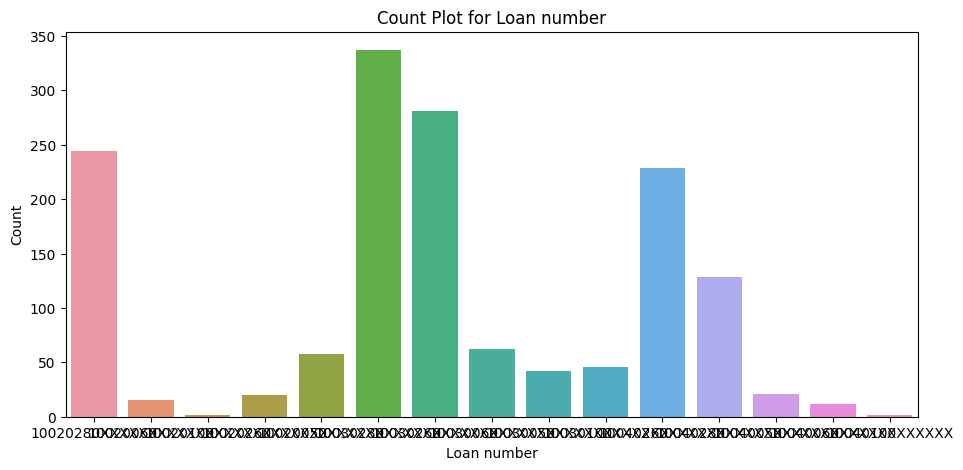

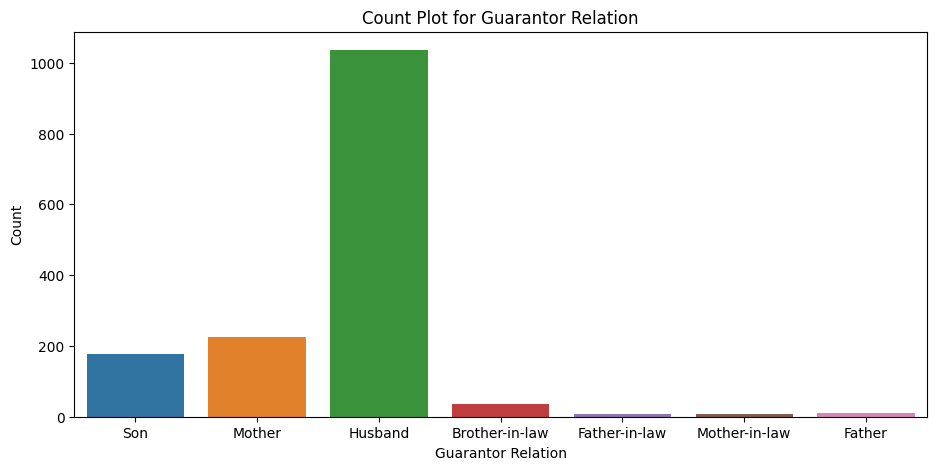

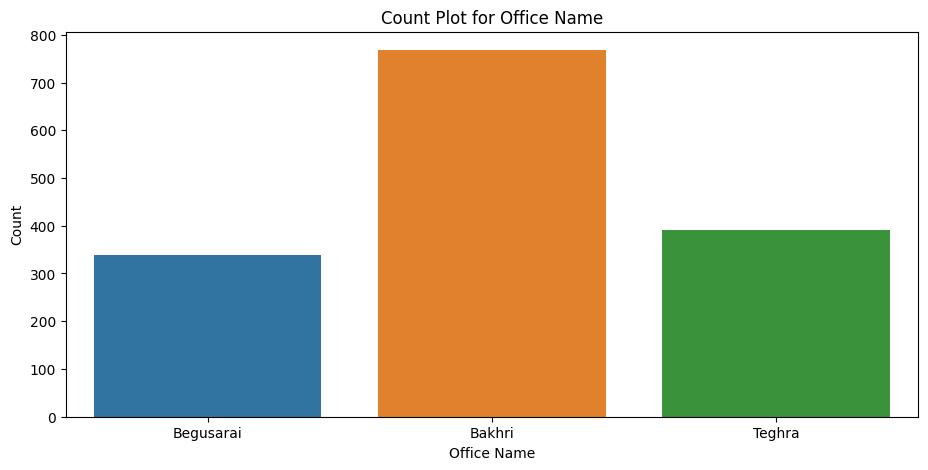

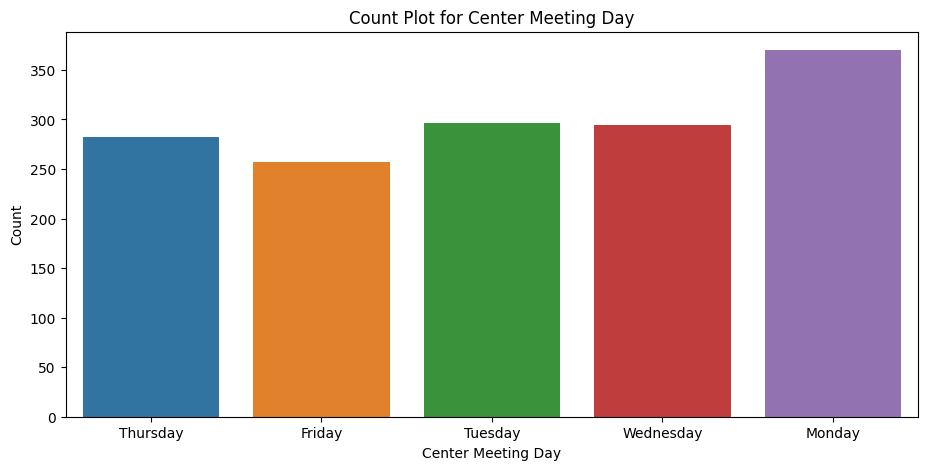

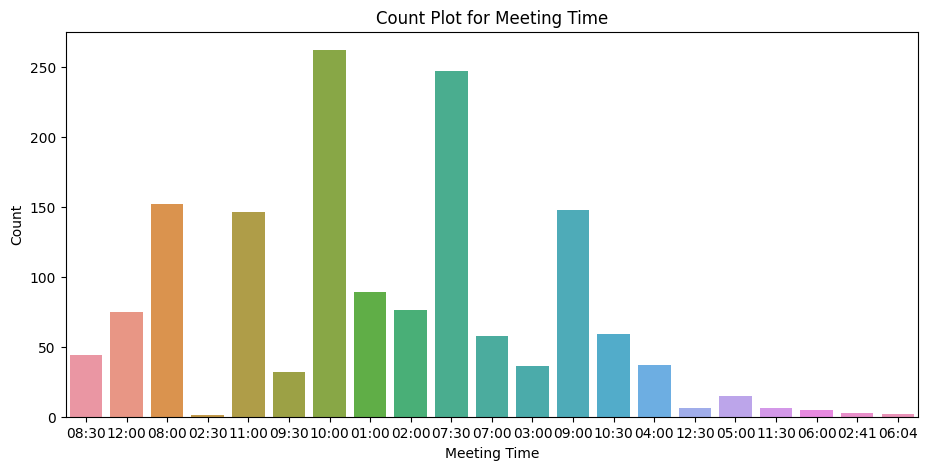

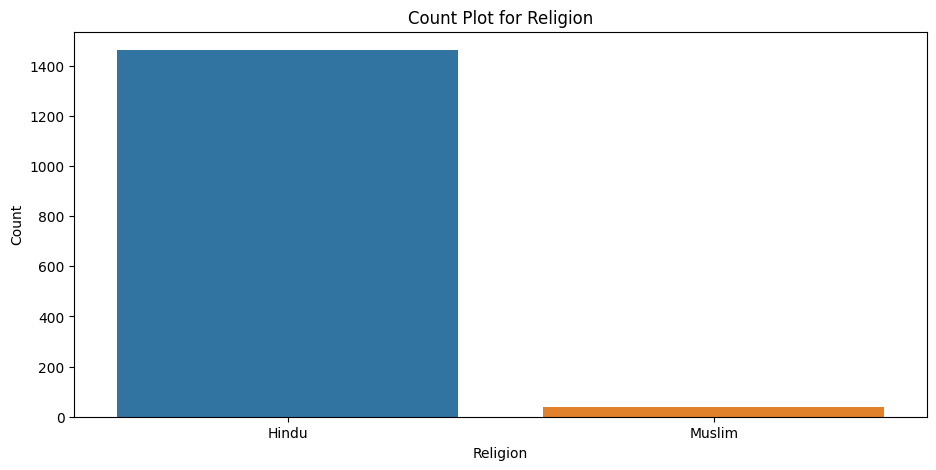

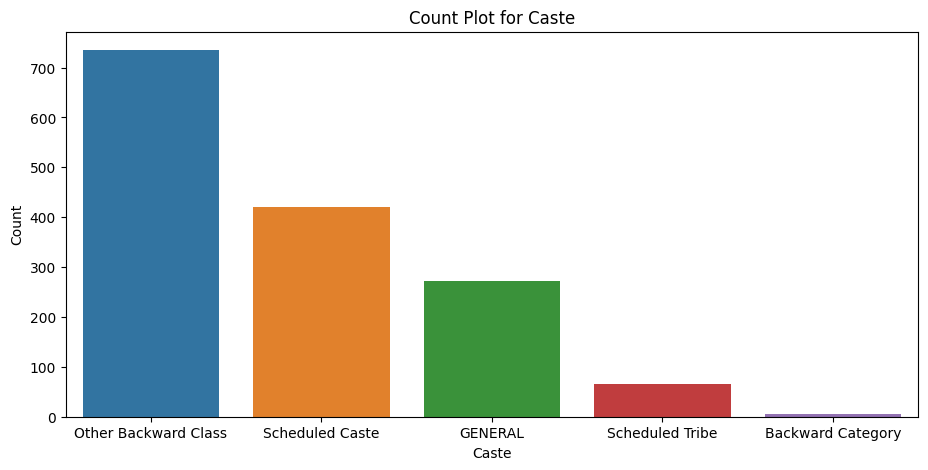

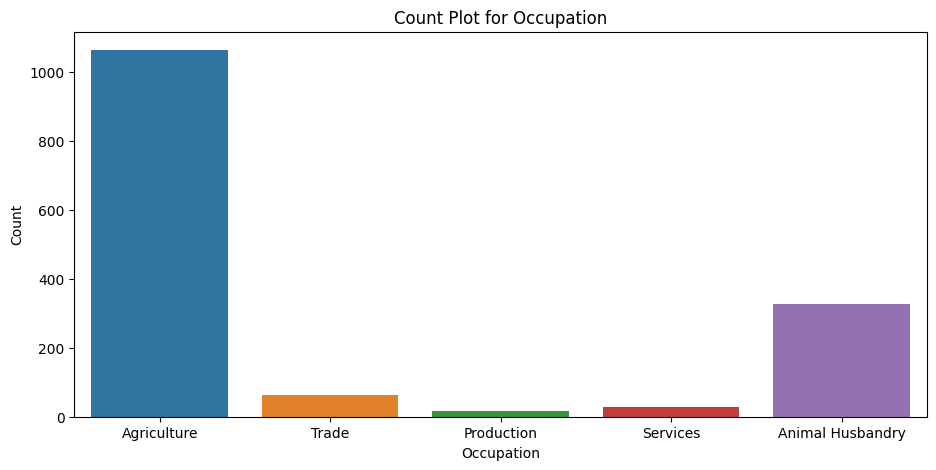

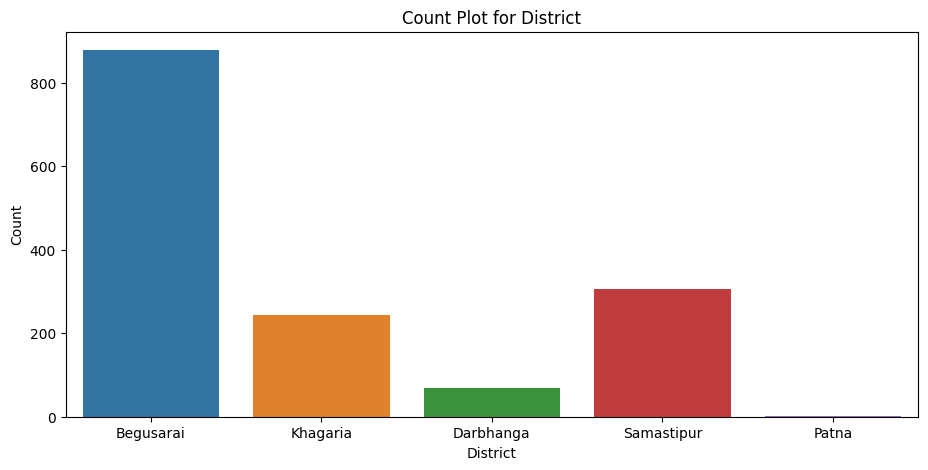

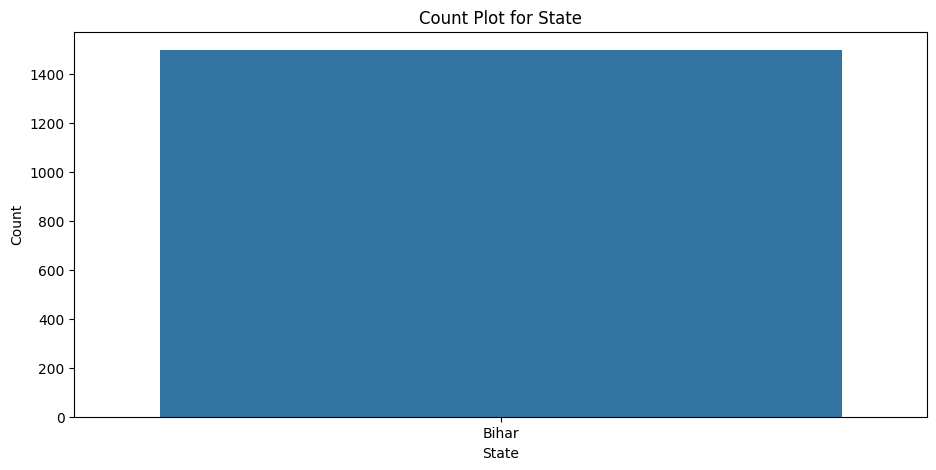

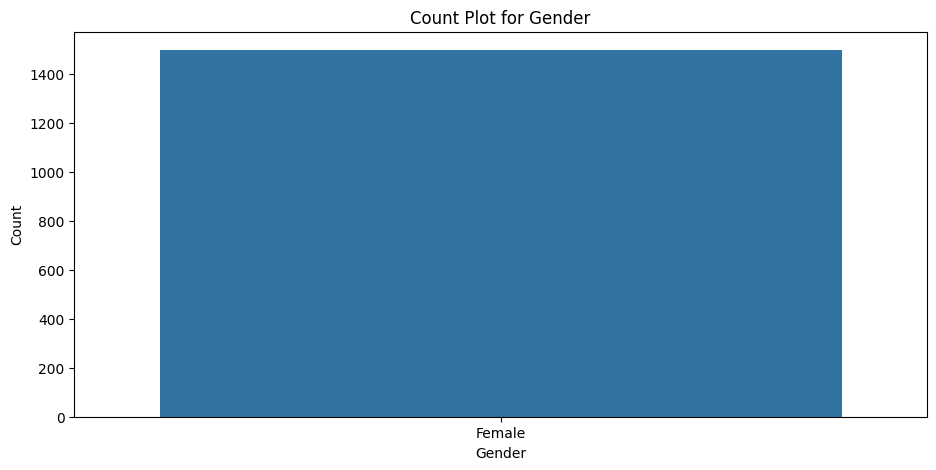

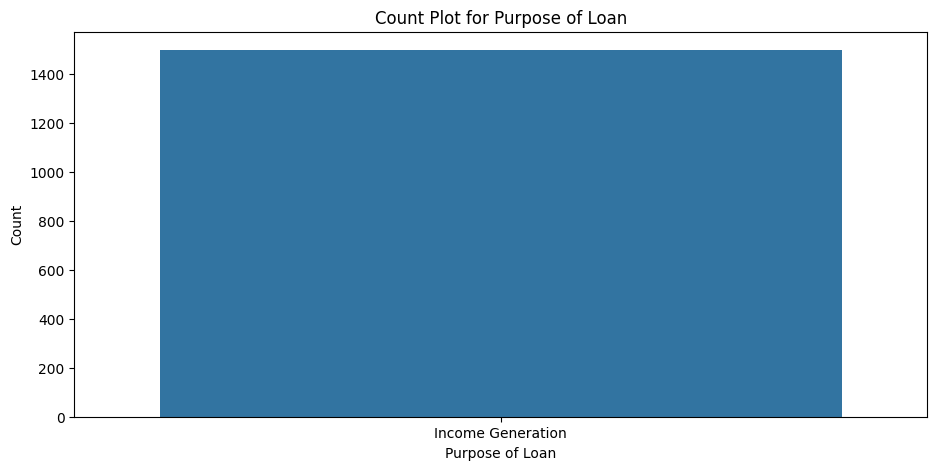

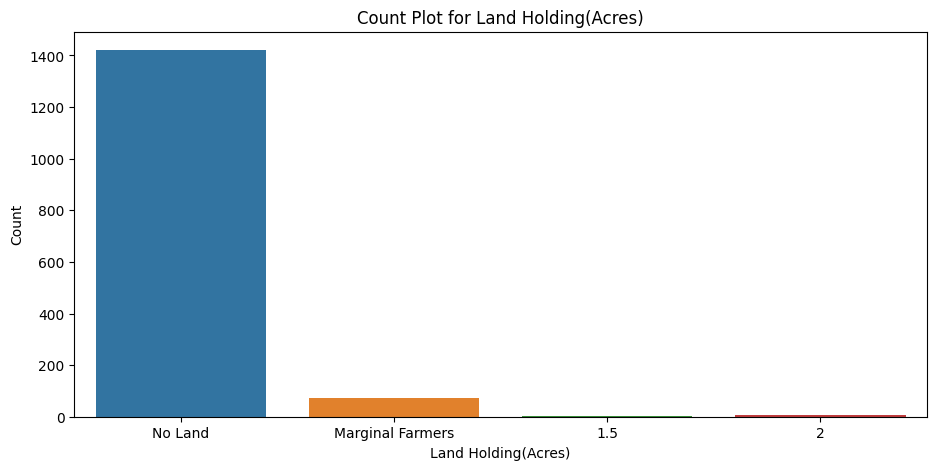

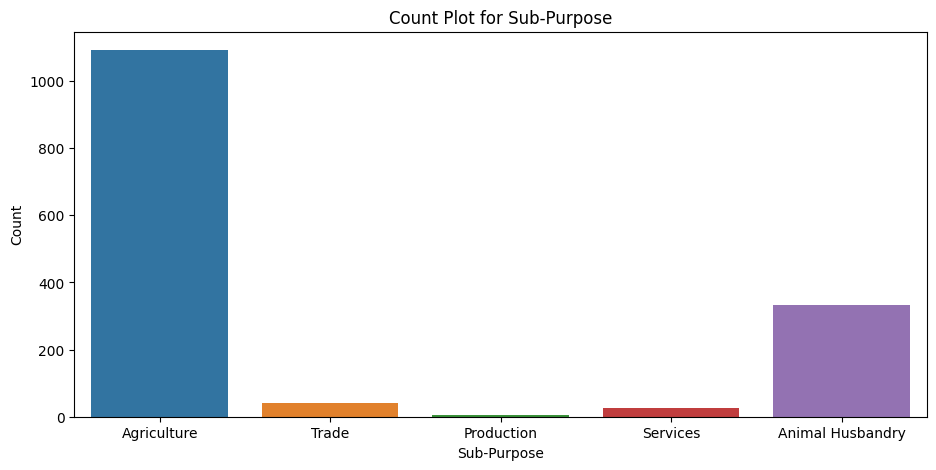

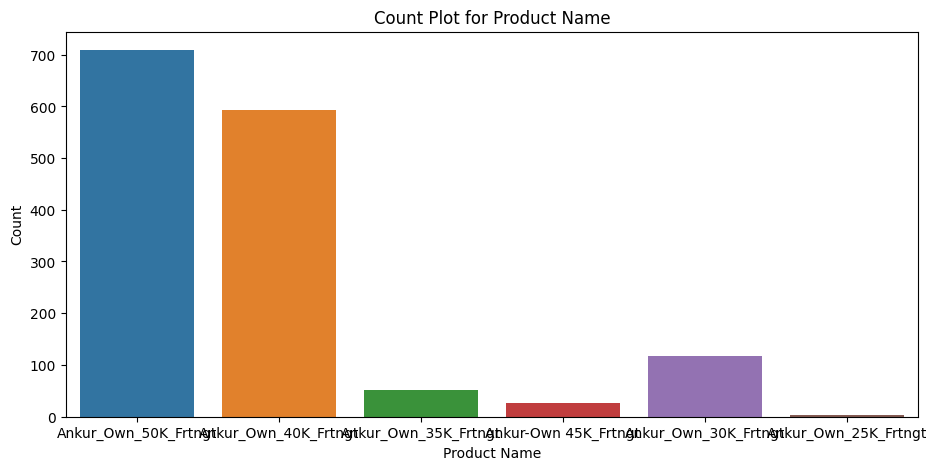

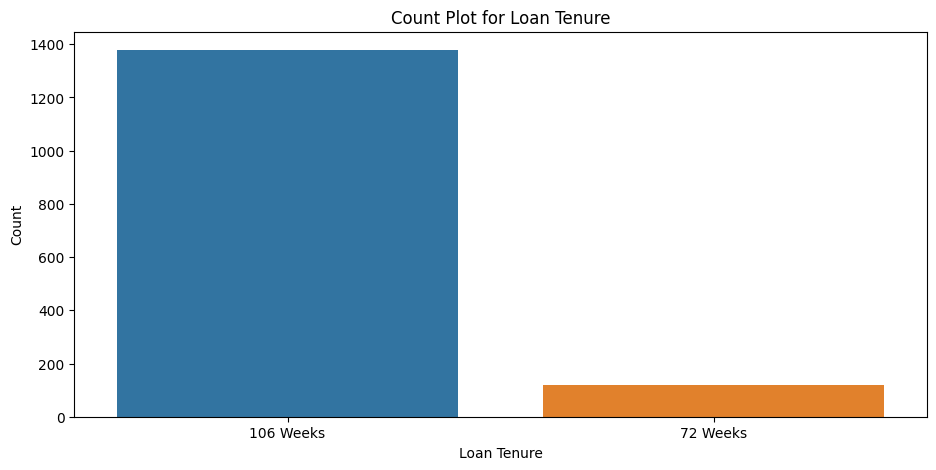

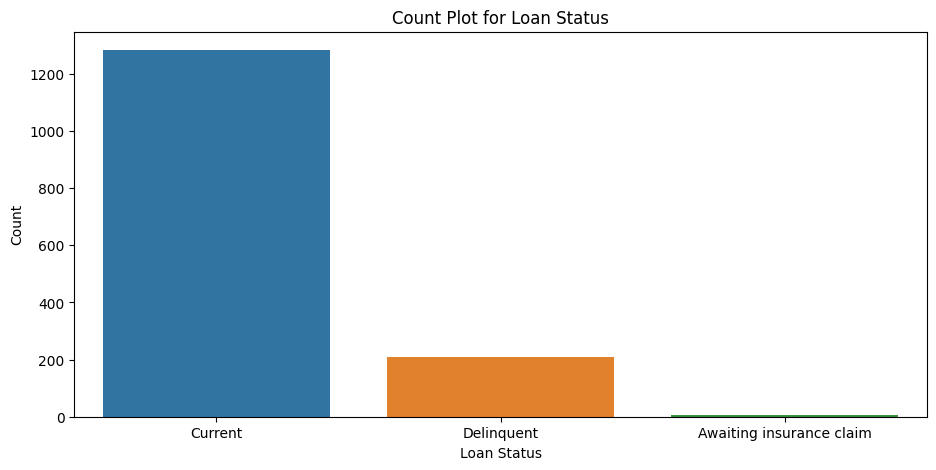

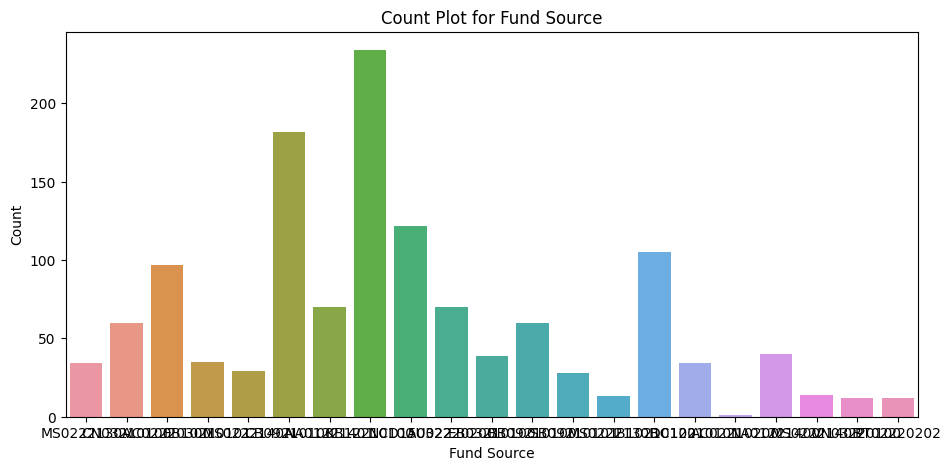

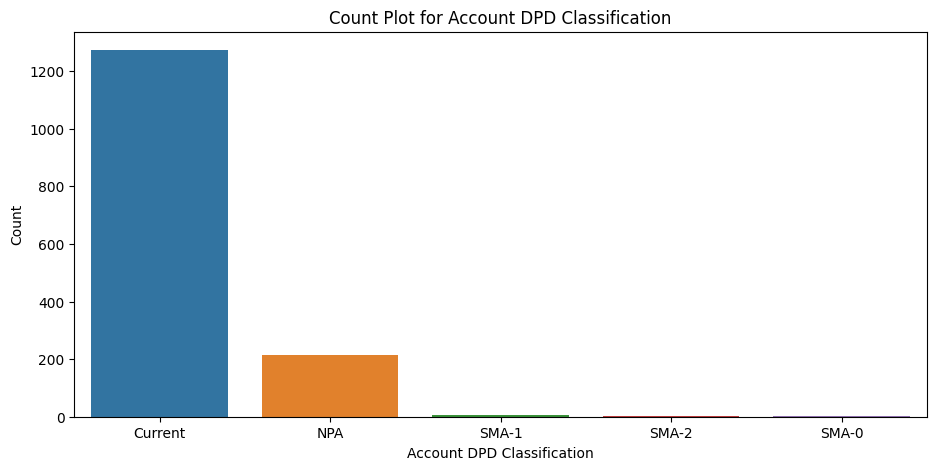

In [12]:
categorical_columns= ['Loan number',
 'Guarantor Relation',
 'Office Name',
 'Center Meeting Day',
 'Meeting Time',
 'Religion',
 'Caste',
 'Occupation',
 'District',
 'State',
 'Gender',
 'Purpose of Loan',
 'Land Holding(Acres)',
 'Sub-Purpose',
 'Product Name',
 'Loan Tenure',
 'Loan Status',
 'Fund Source',
 'Account DPD Classification']

for column in categorical_columns:
    plt.figure(figsize=(11, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
#     plt.xticks(rotation=45, ha='right')  # Adjust rotation if needed
    plt.show()

**Summary of categorical_Information:**
*    **Guarantor Relation**:
     *  Majaority of the guarantor is Husband. 

*    **Office Name**:
    *    50% loan provide from BAKHRI office and rest of 50% from Begusarai and Teghra office
*    **Meeting:**
    *    center Meeting count are same for each day.
*    **meeting time**
    *     Majority of the meeting happening at 10:00 and 7:30    
*    **Religion**
    * 95% customers are Hindu.
*    **Cast**:
    *    the majority customer is belongs Other Backward class and Scheduled class.
*    **Occupation:**
    *    95% customers having Agriculture occupation.
*    **District**
    *     50% of customer belongs from Begusarai district.    
*    **State**
    *     100% customers state is Bihar.
*    **Gender & Loan purpose**
    *     100% customers are Female and their loan purpose is Income generation.
*    **Loan Holding**:
    *    Approx 1400 customers having no Land
*    **Loan Tenure:**
    *    Approx 1350 customers Loan tenure is 106 weeks and Approx 100 customers loan tenure is 72 weeks.
*    **Loan Status**
    *     1284 Loans are in current and 208 loans in Delinquent and 7 loans in Awaiting insurance claim 


### (ii) Distribution of numerical variable

In [13]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes.keys()

Index(['Customer number', 'Office Code', 'Center Code', 'Pincode',
       'Gross Income', 'Officer Employee Number', 'Cycle Number',
       'Product Code', 'Product Interest Rate(%)', 'Loan Amount',
       'Approved Amount', 'Installment Amount(First Slab)',
       'Number of Installments', 'Principal Overdue',
       'Total Interest Collected', 'Interest OverDue', 'Overdue Days',
       'Parked Amount', 'Principal Outstanding', 'Interest Outstanding',
       'Vintage_month', 'Vintage_year', 'Outstanding_Amount', 'Profit', 'PVR'],
      dtype='object')

In [14]:
outstanding_amounts = data.groupby('Loan Status')['Outstanding_Amount'].sum()
outstanding_amounts = outstanding_amounts.reset_index()
outstanding_amounts

,Loan Status,Outstanding_Amount
0,Awaiting insurance claim,82988.48
1,Current,6608183.16
2,Delinquent,3267676.27


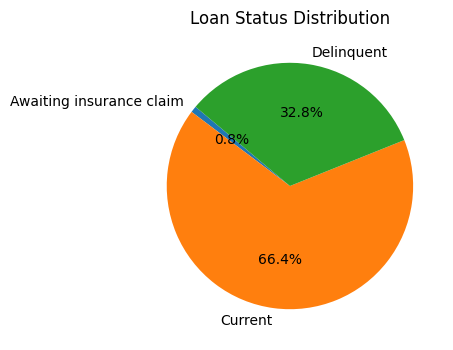

In [15]:
plt.figure(figsize=(8, 4))
plt.pie(outstanding_amounts['Outstanding_Amount'], labels=outstanding_amounts['Loan Status'], autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.show()

**Summary**

* **Loan status "current" having very high Ountstanding amount**

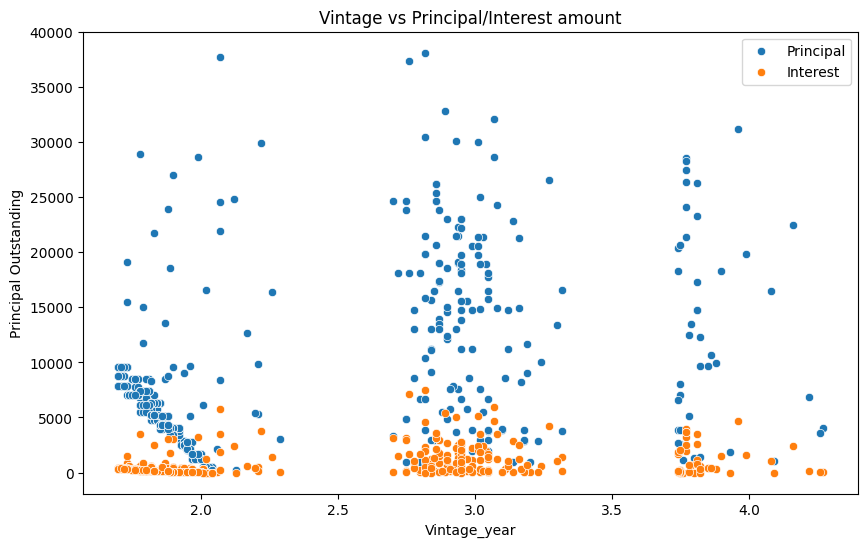

In [16]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vintage_year',y='Principal Outstanding',data=data, label='Principal')
sns.scatterplot(x='Vintage_year',y='Interest Outstanding',data=data, label = 'Interest')
plt.title('Vintage vs Principal/Interest amount')
plt.legend()
plt.show()

**Summary**

* **the customer vintage is 3 year, having more principal amount**
* **the customer vintage is 3 year, having more Intereset amount**

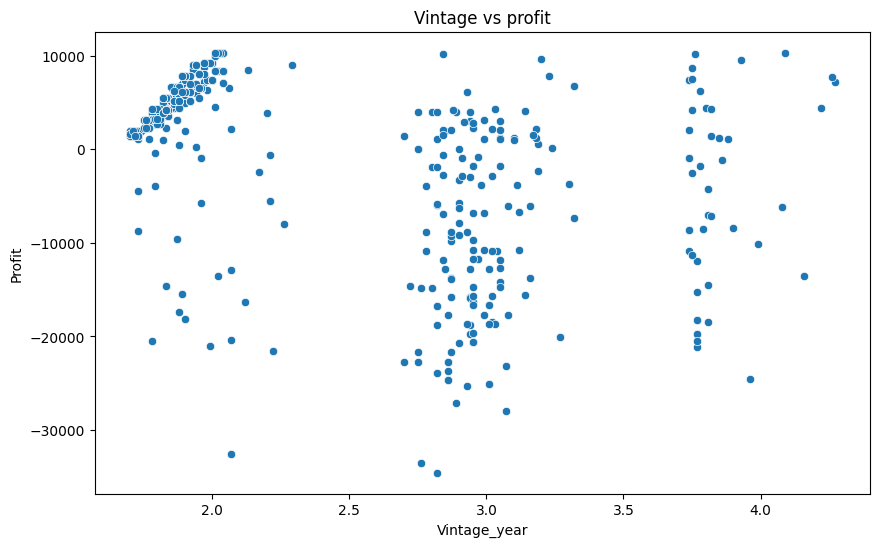

In [17]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vintage_year',y='Profit',data=data)
plt.title('Vintage vs profit')

plt.show()

* **the customer vintage year 2 are more profitable**
* **the customer vintage year 3 are not profitable**

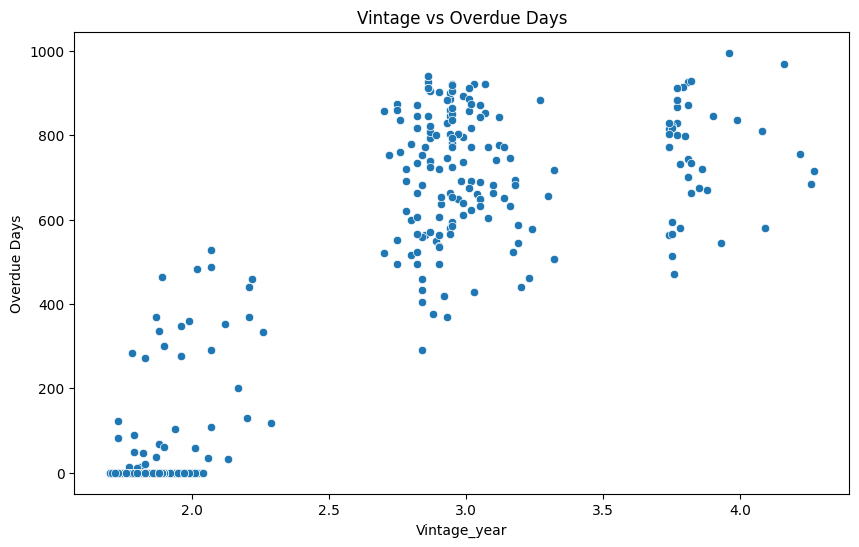

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vintage_year',y='Overdue Days',data=data)
plt.title('Vintage vs Overdue Days')

plt.show()

**Summary**

* **The customer vintage is 3 having more over due days**